# Predicting the Housing prices

- A housing Data set was taken from the internet to predict the housing prices using my own models.
- Used many models but concluded on linearregression since it performed better when I found the log transform of the standardized scaled version of the data. 


In [452]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [453]:
# Load data
df = pd.read_csv('c:/Users/lorth/OneDrive/Desktop/Notebook/Housing Data Analysis/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [454]:
df.info() # wanting to know what the data types are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [455]:
df.isnull().sum() # cheking if there are null values 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [456]:
# Checking for Duplicates
df.duplicated().sum()

0

Checking duplicates, and null or missing values and info are all in aim of dropping the unwanted variables and making sense out of the data.
The same goes for correlation. 
When two dependent variables are highly correlated such that one can be done without the other, then we drop one. This is bacause we want to avoid collinearity.    

In [457]:
# Make a copy of the original data
dff = df.copy()

- Data Visualizing 

In [458]:
list(dff)

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

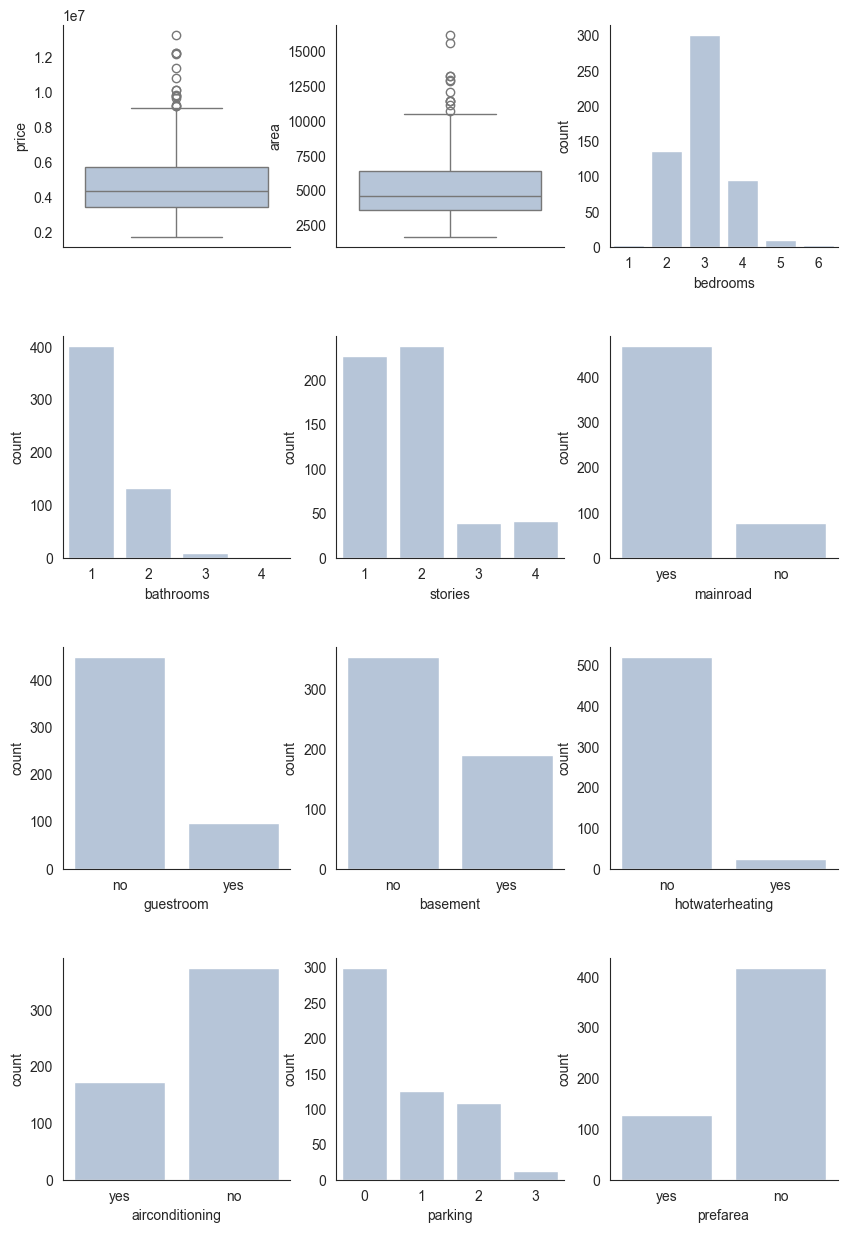

In [459]:
sns.set_style('white') 
fig, ax = plt.subplots(4,3, figsize=(10, 15))
plt.subplots_adjust(hspace = 0.4)

sns.boxplot(dff['price'], color = 'lightsteelblue', ax = ax[0][0])
sns.boxplot(dff['area'], color = 'lightsteelblue', ax = ax[0][1])
sns.countplot(x ='bedrooms', data = dff, color = 'lightsteelblue', ax = ax[0][2])
sns.countplot(x = 'bathrooms', data = dff,  color = 'lightsteelblue', ax = ax[1][0])
sns.countplot(x = 'stories', data = dff,  color = 'lightsteelblue', ax = ax[1][1])
sns.countplot(x = 'mainroad', data = dff,  color = 'lightsteelblue', ax = ax[1][2])
sns.countplot(x = 'guestroom', data = dff,  color = 'lightsteelblue', ax = ax[2][0])
sns.countplot(x = 'basement', data = dff,  color = 'lightsteelblue', ax = ax[2][1])
sns.countplot(x = 'hotwaterheating', data = dff,  color = 'lightsteelblue', ax = ax[2][2])
sns.countplot(x = 'airconditioning', data = dff,  color = 'lightsteelblue', ax = ax[3][0])
sns.countplot(x = 'parking', data = dff,  color = 'lightsteelblue', ax = ax[3][1])
sns.countplot(x = 'prefarea', data = dff,  color = 'lightsteelblue', ax = ax[3][2])
sns.despine()

- Daling with outliers in Target Variable

<Axes: ylabel='price'>

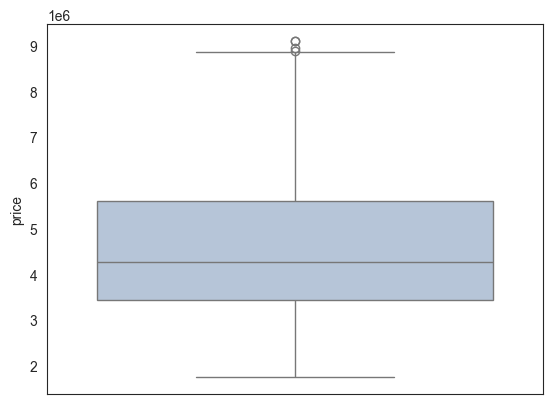

In [460]:
Q1 = dff['price'].quantile(0.25)
Q3 = dff['price'].quantile(0.75)
IQR = Q3-Q1
dff = dff[(dff['price']>= Q1 - 1.5* IQR) & (dff['price'] <= Q3 + 1.5*IQR)]
sns.boxplot(dff.price, color = 'lightsteelblue')

<Axes: ylabel='area'>

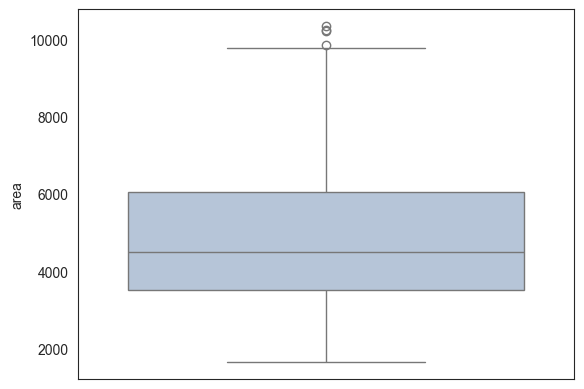

In [461]:
# Dealing with outliers in area 
Q1 = dff['area'].quantile(0.25)
Q3 = dff['area'].quantile(0.75)
IQR = Q3-Q1
dff = dff[(dff['area']>= Q1 - 1.5* IQR) & (dff['area'] <= Q3 + 1.5*IQR)]
sns.boxplot(dff.area, color = 'lightsteelblue')

<Axes: xlabel='furnishingstatus', ylabel='price'>

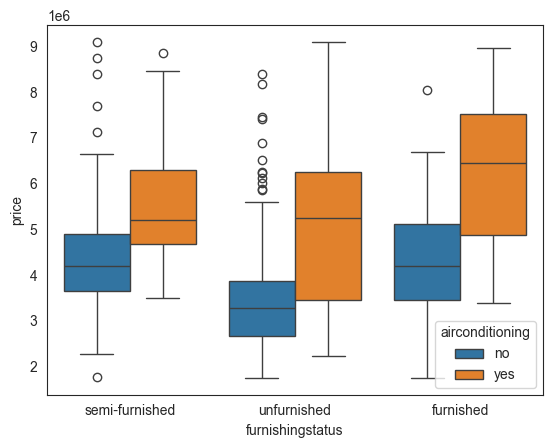

In [462]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = dff)

- Finding the Correlation of the numerical Data in the Dataset using Heatmap

<Axes: >

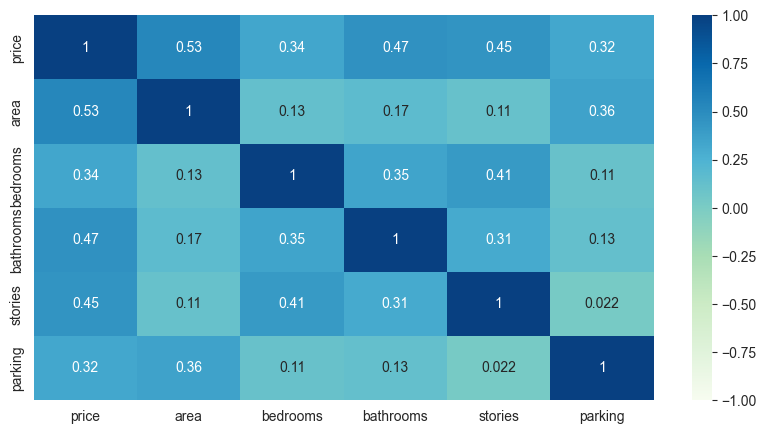

In [463]:
plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(numeric_only=True), cmap = 'GnBu', vmax = 1, vmin= -1, annot = True)
 

<Axes: xlabel='area', ylabel='price'>

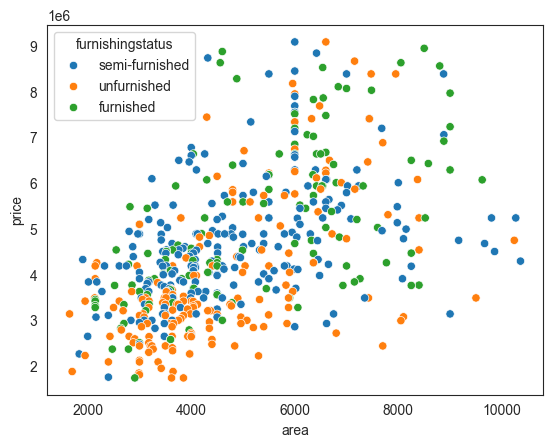

In [464]:
sns.scatterplot(x = 'area', y = 'price', data = dff, color = 'lightsteelblue', hue = 'furnishingstatus')

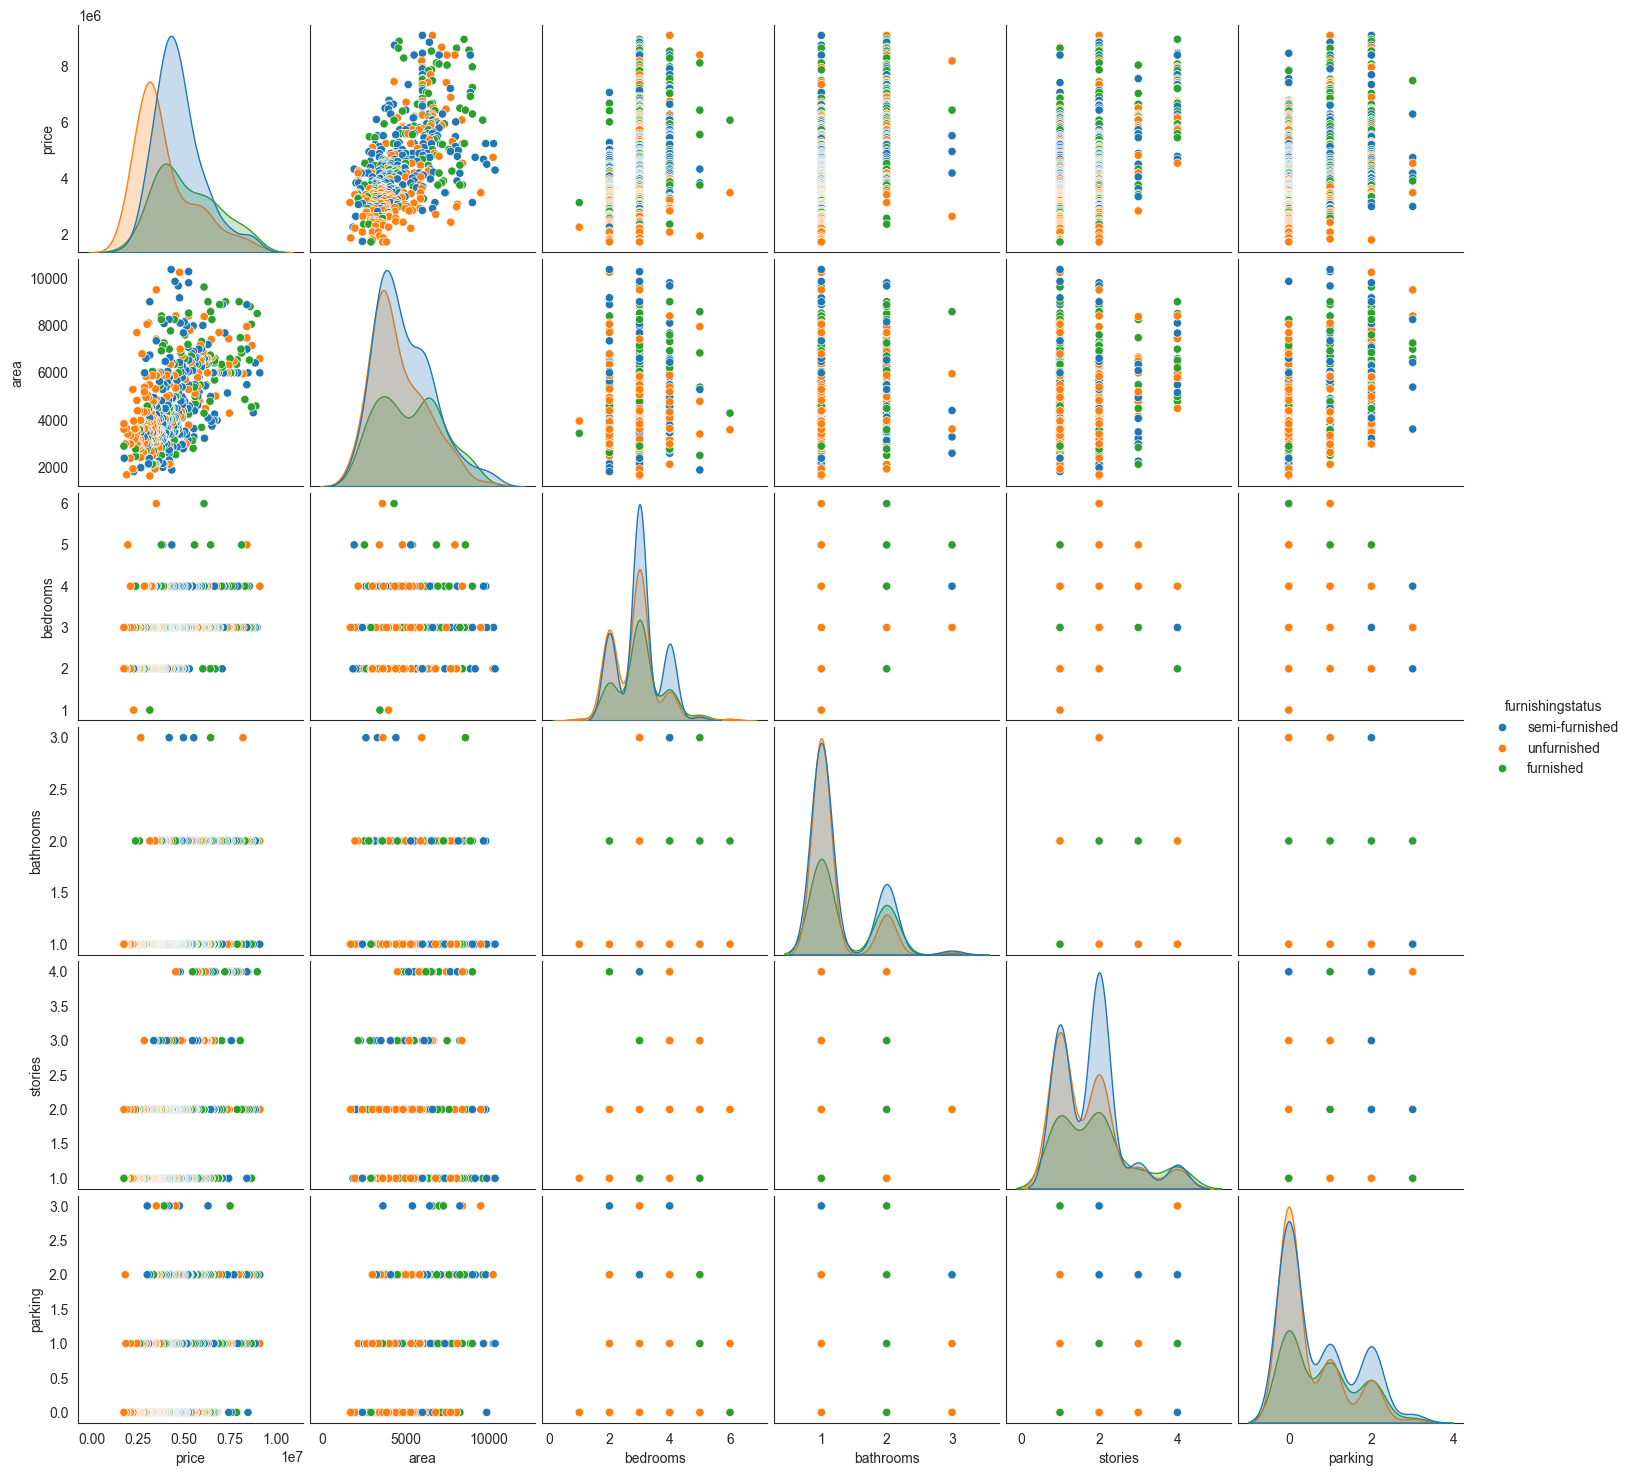

In [465]:
sns.pairplot(dff, hue = 'furnishingstatus')

# Feature Engineering 

In [466]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [467]:
dff['mainroad'] = lab.fit_transform(dff['mainroad']) # No = 0, Yes = 1 
dff['guestroom'] = lab.fit_transform(dff['guestroom']) # No = 0, Yes = 1
dff['basement'] = lab.fit_transform(dff['basement']) # No = 0 and Yes = 1
dff['hotwaterheating'] = lab.fit_transform(dff['hotwaterheating']) # No = 0 and Yes = 1
dff['airconditioning'] = lab.fit_transform(dff['airconditioning']) # No = 0, Yes = 1
dff['prefarea'] = lab.fit_transform(dff['prefarea']) # No =0, Yes = 1
dff

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [468]:
# Transforming the furnishing status into numeric using OneHotEncoder
ndff = pd.get_dummies(dff['furnishingstatus'], dtype = int)
dff = pd.concat([dff, ndff], axis =1 )
dff.drop(['furnishingstatus'], axis = 1, inplace = True)
dff.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


In [469]:
# Identifying the target(dependent) variable and our independent variables
X = dff.drop(dff.columns[[0]], axis = 1)
Y = dff['price']

In [470]:
# Splitting the data into a train and a test data set. 
# The test dataset acting as a check for the train dataset

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 42)

In [471]:

model = {
    'LinearRegression' : LinearRegression(),
    'RidgeReg' :   Ridge(),
    'Lasso Reg' : Lasso()

}

In [472]:
predicted = {}

for name, model in model.items():
    model.fit(X_train, Y_train)
    # calculate prdiction error for test
    y_pred_test = model.predict(X_test)
    predicted[name] = y_pred_test
 

Results for LinearRegression: 
RMSE : 976818.1737052684
R2 Score : 0.6747673447811056


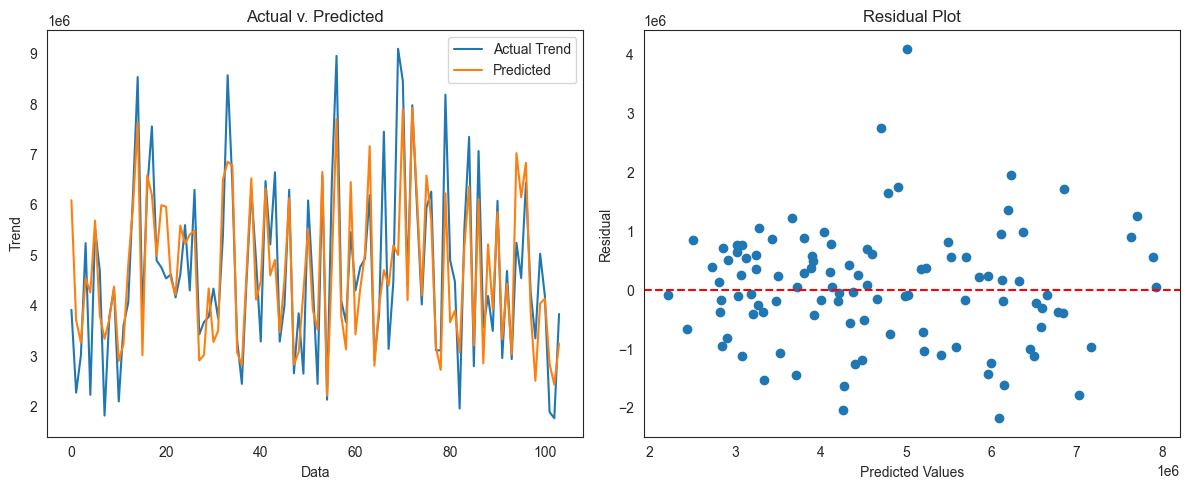

Results for RidgeReg: 
RMSE : 976736.5911485958
R2 Score : 0.6748216685114106


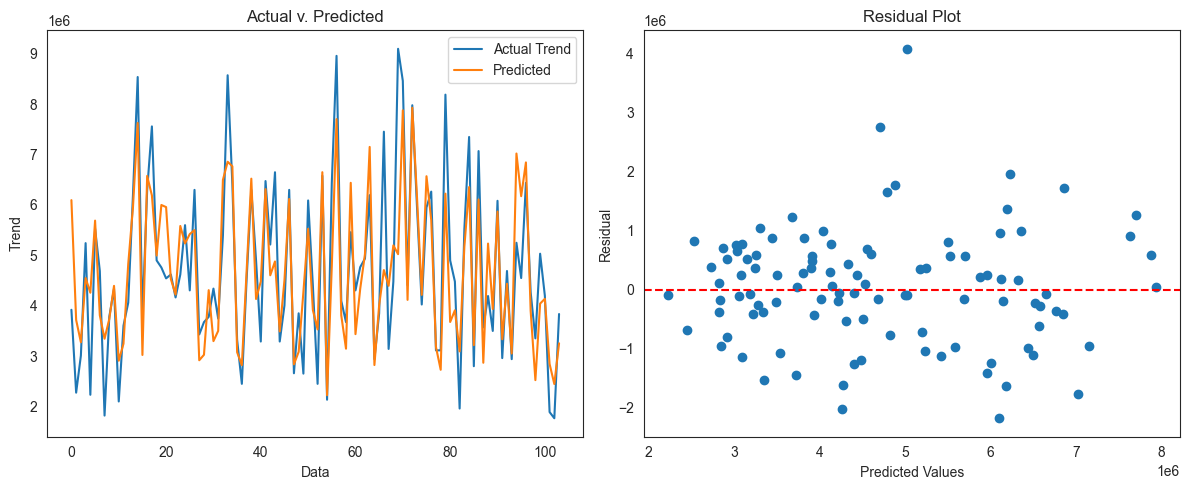

Results for Lasso Reg: 
RMSE : 976818.3806051296
R2 Score : 0.6747672070060309


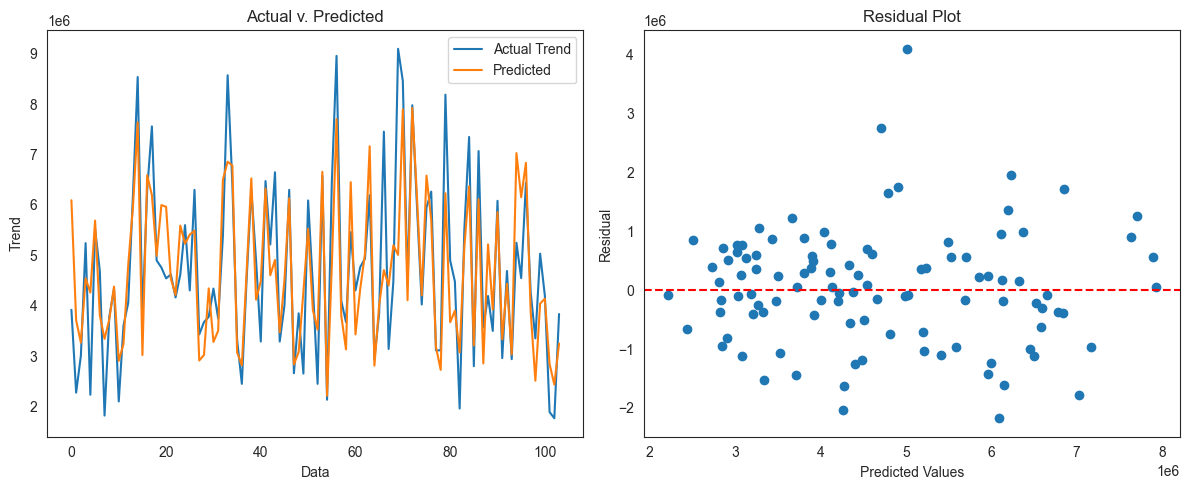

In [479]:
almost = {}
for name, y_pred_test in predicted.items():
    error_test = Y_test - y_pred_test
    rmse_test = (np.mean(error_test**2))**0.5
    R2 = r2_score(Y_test, y_pred_test) 
    #almost[name] = R2

    print(f"Results for {name}: ")
    print(f"RMSE : {rmse_test}")
    print(f"R2 Score : {R2}")
    plt.figure(figsize = (12, 5))

    #plotting Actual v. Predicted 
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(Y_test)), Y_test, label = 'Actual Trend')
    plt.plot(np.arange(len(Y_test)), y_pred_test, label = 'Predicted')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual v. Predicted')

    # Plotting Residuals 
    plt.subplot(1,2,2)
    plt.scatter(y_pred_test, error_test)
    plt.axhline(y = 0, color = 'red', linestyle = '--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    plt.title('Residual Plot')


    plt.tight_layout()
    plt.show()

    # Percentage Change 
    #PC =(rmse_test - rmse_train)/ rmse_train * 100
    #print(PC)

In [474]:
model.fit(X_train, Y_train)
# calculate the prediction error for train
y_pred_train_unscaled = model.predict(X_train) 
error_train_unscaled = Y_train - y_pred_train_unscaled 
# Calculate rmse for train
rmse_train_unscaled = (np.mean(error_train_unscaled **  2))** 0.5

# Calculate prediction error for test
y_pred_test_unscaled = model.predict(X_test)
error_test_unscaled = Y_test - y_pred_test_unscaled
# Calculate rmse for train
rmse_test_unscaled = (np.mean(error_test_unscaled **  2))** 0.5

# Percentage change
(rmse_test_unscaled - rmse_train_unscaled)/rmse_train_unscaled  * 100

# Finding the R2_score 
R2 = r2_score(Y_test,y_pred_test_unscaled)
R2


0.6747672070060309

- Use the standard scaled version of the data

In [475]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = model.fit(X_train_scaled, Y_train)

In [476]:

# calculate thr prediction error for train
y_pred_train_scaled = model.predict(X_train_scaled)
error_train_scaled = Y_train - y_pred_train_scaled
# calculate rmse for train
rmse_train_scaled = (np.mean(error_train_scaled ** 2)) **0.5

# calculate the prediction error for test
y_pred_test_scaled = model.predict(X_test_scaled)
error_test_scaled = Y_test - y_pred_test_scaled
# calculate rmse for test
rmse_test_scaled= (np.mean(error_test_scaled ** 2)) ** 0.5

# percentage change 
(rmse_test_scaled - rmse_train_scaled)/ rmse_train_scaled * 100

# Calculate the R2_score 
R2 = r2_score(Y_test,y_pred_test_scaled)
R2

0.6747673803246199

In [477]:
import numpy as np
import matplotlib.pyplot as plt

a = Y_train
b = log_y_train

bins = np.linspace(-10, 10, 20)

plt.hist(a, alpha=0.5, label="a")
plt.hist(b, alpha=0.5, label="b")
plt.legend(loc="upper left")


plt.show()

NameError: name 'log_y_train' is not defined

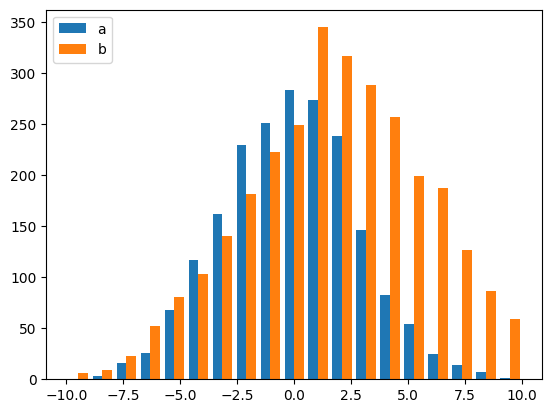

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(0, 3, 2000)
b = np.random.normal(2, 4, 3000)

bins = np.linspace(-10, 10, 20)

plt.hist([a, b], bins, label=["a", "b"])
plt.legend(loc="upper left")
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
#plt.hist(Y_train)
#plt.title('A histogram of the Y_train'),plt.xlabel('X-axis'), plt.ylabel('Y-axis')
#plt.show()
# plot of the log Y-train
#plt.hist(np.log(Y_train))
#plt.title('A histogram of the Log(Y_train)'),plt.xlabel('X-axis'), plt.ylabel('Y-axis')
#plt.show()


In [ ]:
# plot residual verse fitted value 
import matplotlib.pyplot as plt
plt.scatter(y_predicted, Y_train), 
plt.show() 

NameError: name 'y_predicted' is not defined

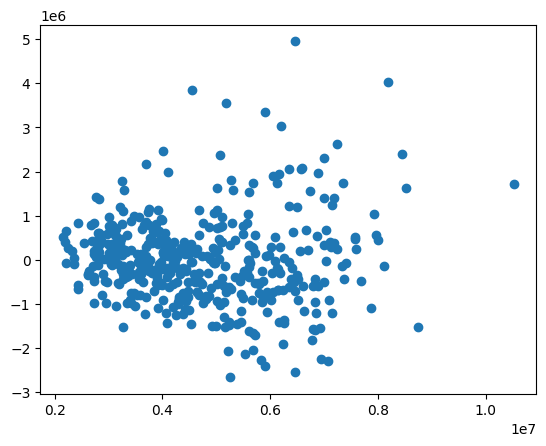

In [ ]:
# check nonlinearity, 
plt.scatter( y_predicted, Residual_error,)
plt.show()

- use the model on the test Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
reg = LinearRegression() 
out = reg.fit(X_train_scaled,Y_train)
print(reg.coef_)

[3433346.10607724  383893.50817189 3283334.35830179 1222429.78495473
  367919.94767957  231610.03717565  390251.17618109  684649.88533879
  791426.73584319  674525.73982988  629890.56531336  180175.62660444
   53293.80901933 -233469.43562378]


In [ ]:
from statsmodels.formula.api import ols
linear_model = ols( Y_train, X_train_scaled,final).fit() 

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
# display model summary 
print(reg.summary()) 
  
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(out, 'area', fig=fig)

AttributeError: 'LinearRegression' object has no attribute 'summary'

# Regression Models

Regression models are considered when the target (dependent) variable is either

- Continous
- Discrete

In [ ]:
from sklearn.linear_model import LinearRegression


array([4, 4, 3, 4, 4, 3, 4, 5, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 5, 4, 3, 3, 4, 3, 5, 3, 3, 4, 3, 4, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 2, 4, 4, 3, 3,
       2, 3, 3, 4, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 3, 2, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       3, 3, 6, 3, 2, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 5, 4, 3, 2, 3, 3, 4, 3, 4, 5, 3,
       3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 4, 3, 3,
       3, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 2, 3, 3, 3, 2, 3,
       4, 4, 2, 3, 2, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 4, 3, 3, 5, 3, 4, 4, 2, 2, 2, 3, 2, 2, 2, 3, 4, 2, 3,
       3, 3, 3, 2, 4, 3, 4, 2, 4, 3, 3, 3, 3, 3, 3,

In [ ]:
new_df = df[['price', 'area']].copy()

In [ ]:
area_bin = df['area'] * 0
new_df['area_bin']= area_bin
new_df

,price,area,area_bin
0,13300000,7420,0
1,12250000,8960,0
2,12250000,9960,0
3,12215000,7500,0
4,11410000,7420,0
...,...,...,...
540,1820000,3000,0
541,1767150,2400,0
542,1750000,3620,0
543,1750000,2910,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
guest_bin = pd.get_dummies(df['guestroom'], dtype = int)
basement_bin =pd.get_dummies(df['basement'], dtype = int)
print(guest_bin)
basement_bin 

     no  yes
0     1    0
1     1    0
2     1    0
3     1    0
4     0    1
..   ..  ...
540   1    0
541   1    0
542   1    0
543   1    0
544   1    0

[545 rows x 2 columns]


,no,yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
540,0,1
541,1,0
542,1,0
543,1,0


In [ ]:
furnishing_status_bin = pd.get_dummies(df['furnishingstatus'], dtype = int)
furnishing_status_bin

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Classification


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
price_mean = np.mean(df['price'])
print(price_mean)
Q1 = np.percentile(df['price'], 25, method = 'midpoint')
Q3 = np.percentile(df['price'], 75, method = 'midpoint')
print(Q1)
print(Q3)
IQR = Q3-Q1
print(IQR)
upper = Q3 + IQR*1.5
print(upper)
lower = Q1 - IQR*1.5
print(lower)


4766729.247706422
3430000.0
5740000.0
2310000.0
9205000.0
-35000.0


In [ ]:
upper_outlier = np.array(df['price'] > upper).sum()
print(upper_outlier)
lower_outlier = np.array(df['price']> lower).sum()
print(lower_outlier)

15
545


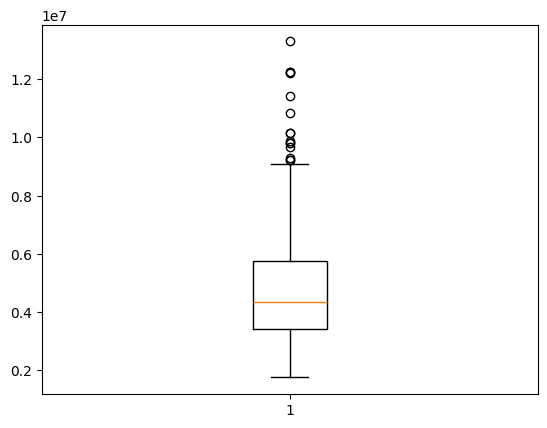

In [ ]:
import matplotlib.pyplot as plt
graph = plt.boxplot(df['price'])
plt.show(graph)

In [ ]:
print(np.mean(df['area']), np.max(df['area']), np.min(df['area']))
print(np.mean(df['bedrooms']), np.max(df['bedrooms']), np.min(df['bedrooms']))

5150.54128440367 16200 1650
2.9651376146788992 6 1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape

(545, 13)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna(axis = 0)
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
newdf = df.select_dtypes(include='number')
newdf

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [ ]:
newdf.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [ ]:
data = df.copy()
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

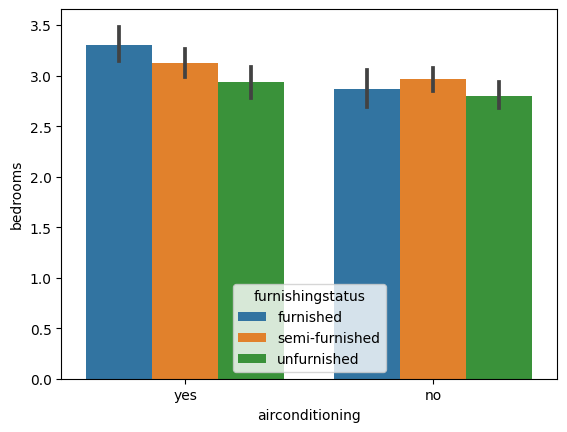

In [ ]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

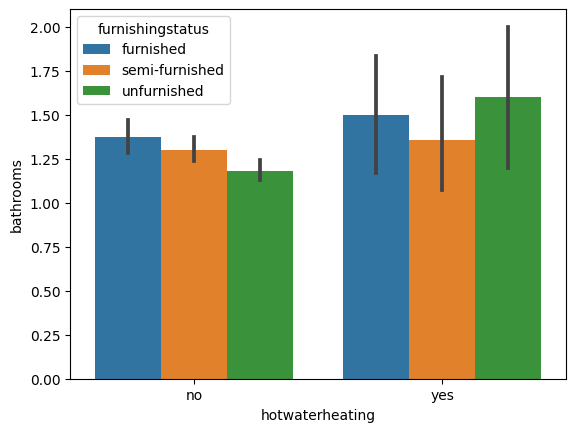

In [ ]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

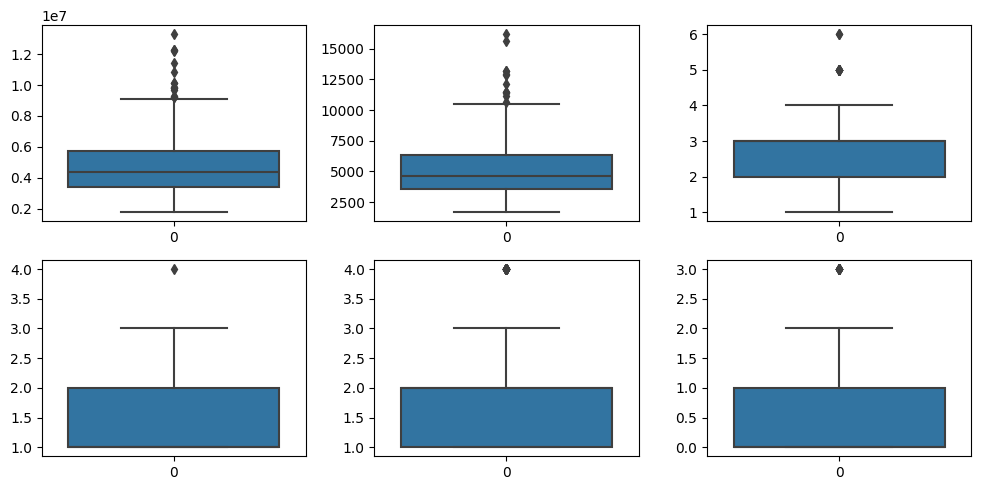

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

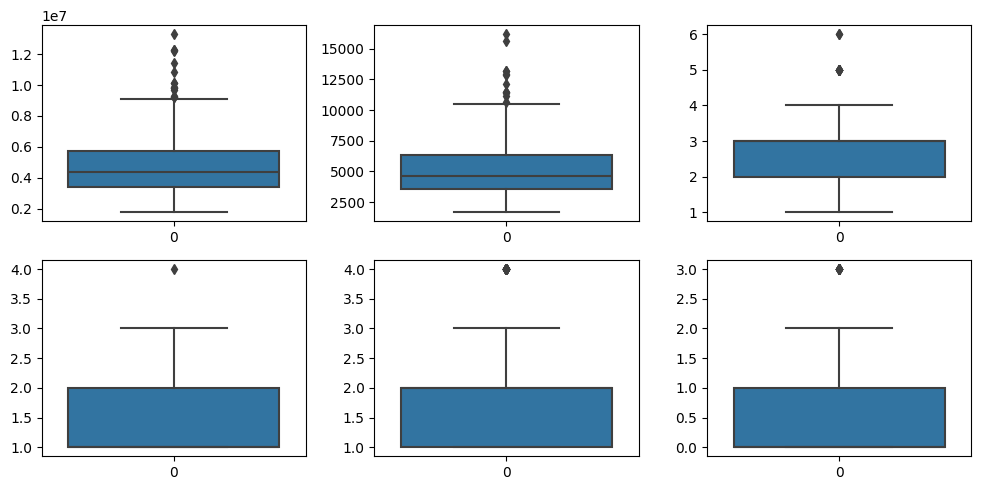

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()